## Note

- For Machine Learning, data preprocessing will always take 80% of the time
- Model fitting 20% and will always be the same, nothing changes here.

In [19]:
# import analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso # this is the actual model
from sklearn.metrics import mean_squared_error, r2_score # this are for evaluation

In [2]:
# import data from github
url = "https://raw.githubusercontent.com/josephgitau/Nov-Intake-Notebooks/refs/heads/main/calories.csv"

df = pd.read_csv(url)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df.duplicated().sum() # check for duplicates

np.int64(0)

In [4]:
# Missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
## Drop User_ID column
df.drop(columns=['User_ID'], inplace=True)

## Basic EDA

- Check the distribution of numeric variable
- Check the correlation
- Scatter plots

In [6]:
## Create a function to plot the distribution of a column
def plot_distribution_plot(data=df, column=None, hue=None):
    plt.figure(figsize=(6, 6))
    sns.histplot(data=data, x=column, hue=hue, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'bins of {column}')
    plt.ylabel('Frequency')
    plt.show()

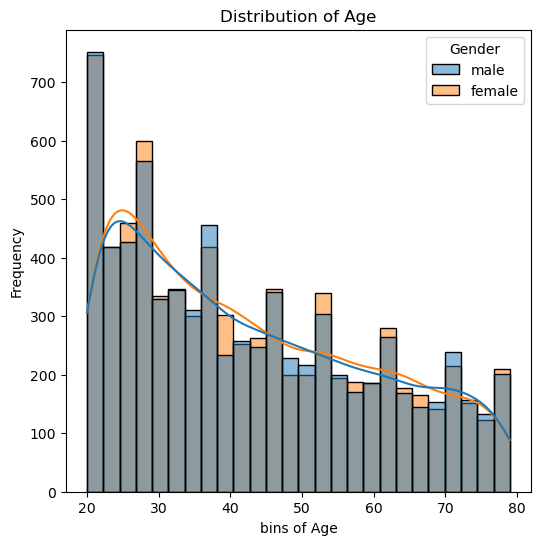

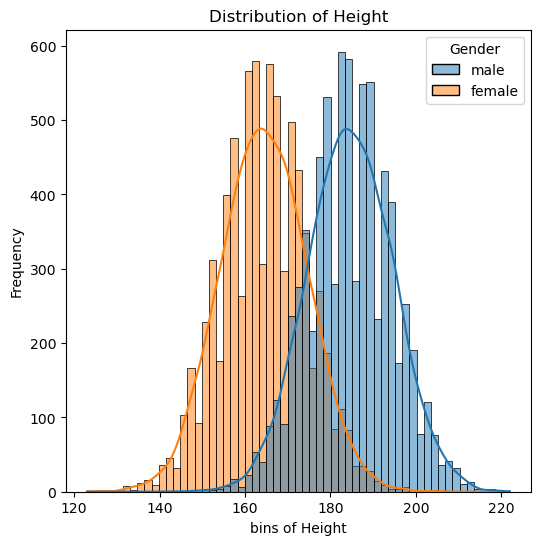

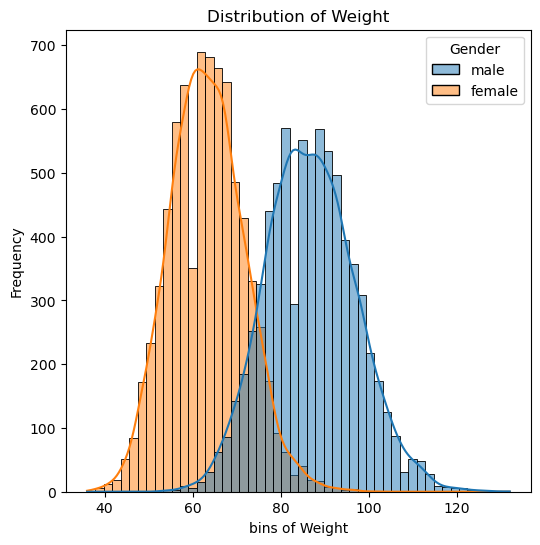

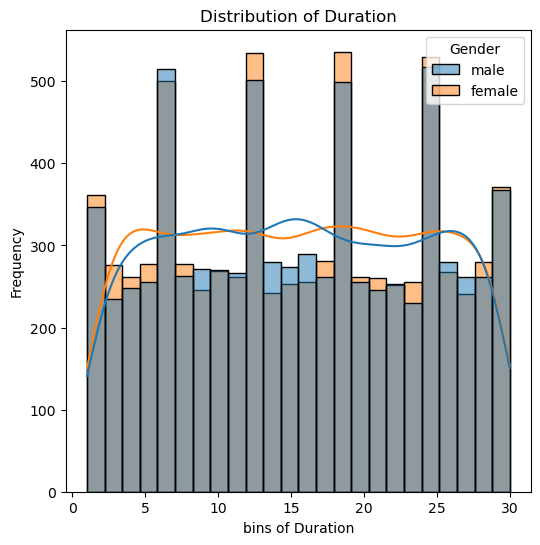

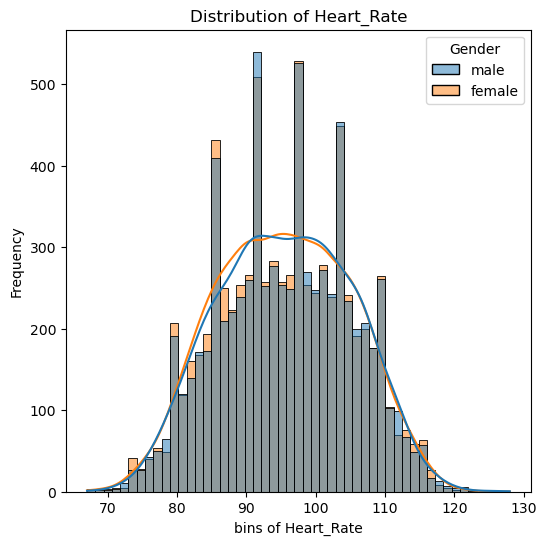

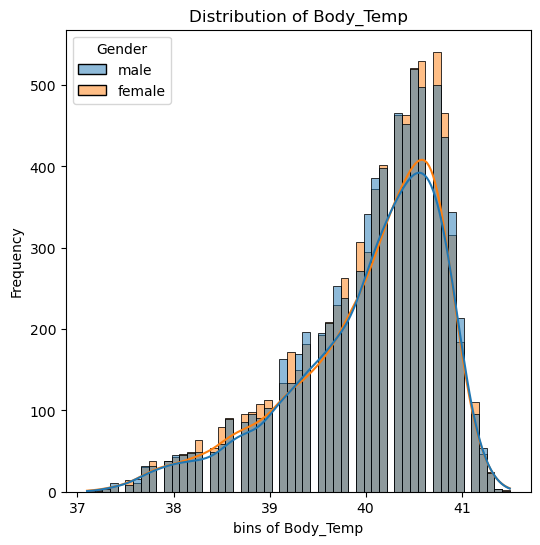

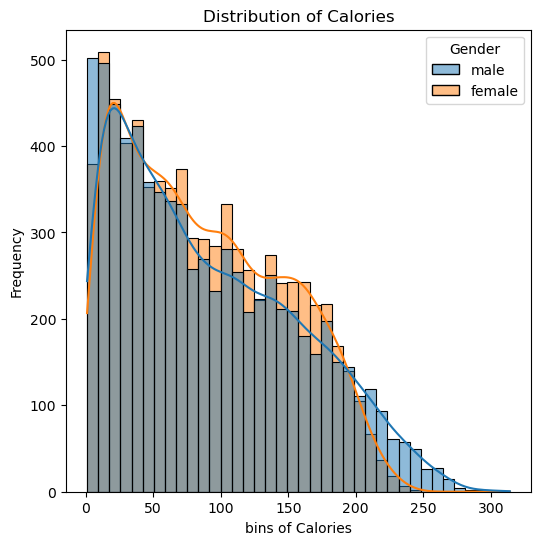

In [7]:
# for loop

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plot_distribution_plot(data=df, column=column, hue='Gender')

<Axes: >

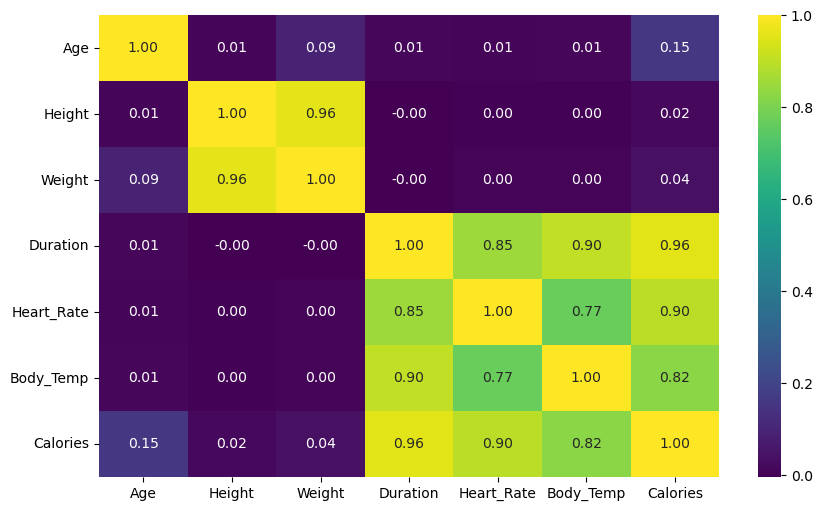

In [8]:
# heatmap
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')

## Model Creation

In [9]:
X = df.drop(columns=['Calories']) # 2D array
y = df['Calories'] # 1D array

In [10]:
# Ml models only work with numerical data (Data Encoding)

gender_map = {"male":0, "female":1}
X["Gender"] = X["Gender"].map(gender_map)
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [32]:
# instantiate the model
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Ridge regression with regularization
lasso_model = Lasso(alpha=1.0)  # Lasso regression with regularization

# fit th model
lr_model.fit(X, y)
ridge_model.fit(X, y)
lasso_model.fit(X, y)

# make predictions
y_pred = lr_model.predict(X)
y_pred_ridge = ridge_model.predict(X)
y_pred_lasso = lasso_model.predict(X)

In [33]:
# print the model coefficients and intercept
print(f"Coefficient: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_}")

# y = m1x1 + m2x2 + ... + c

Coefficient: [  1.2678808    0.50087537  -0.18314014   0.30095434   6.64033677
   1.99031736 -16.98153103]
Intercept: 463.31158982121883


In [34]:
## Making predictions on sample data

sample_data = df.sample(5, random_state=12)
sample_data['Gender'] = sample_data["Gender"].map(gender_map)
sample_data["Calories_pred"] = lr_model.predict(sample_data.drop(columns=['Calories']))
sample_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Calories_pred
2429,0,24,184.0,80.0,23.0,99.0,41.0,107.0,119.237552
12906,0,48,170.0,75.0,3.0,90.0,38.7,13.0,20.655681
4969,1,63,158.0,61.0,30.0,106.0,40.9,202.0,201.195816
6326,0,38,186.0,82.0,17.0,95.0,40.1,81.0,93.965524
1662,1,50,179.0,73.0,17.0,100.0,40.0,97.0,111.467041


In [35]:
97.0 + 11.31

108.31

In [36]:
# Accuracy of the model
## Linear Regression
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}, R^2 Score: {r2}")
## Ridge Regression
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
## Lasso Regression
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

Linear Regression - Mean Squared Error: 127.93567432209511, R^2 Score: 0.9672011449723691
Ridge Regression - Mean Squared Error: 127.93568662489255, R^2 Score: 0.9672011418183023
Lasso Regression - Mean Squared Error: 138.84561362880524, R^2 Score: 0.9644041650089842


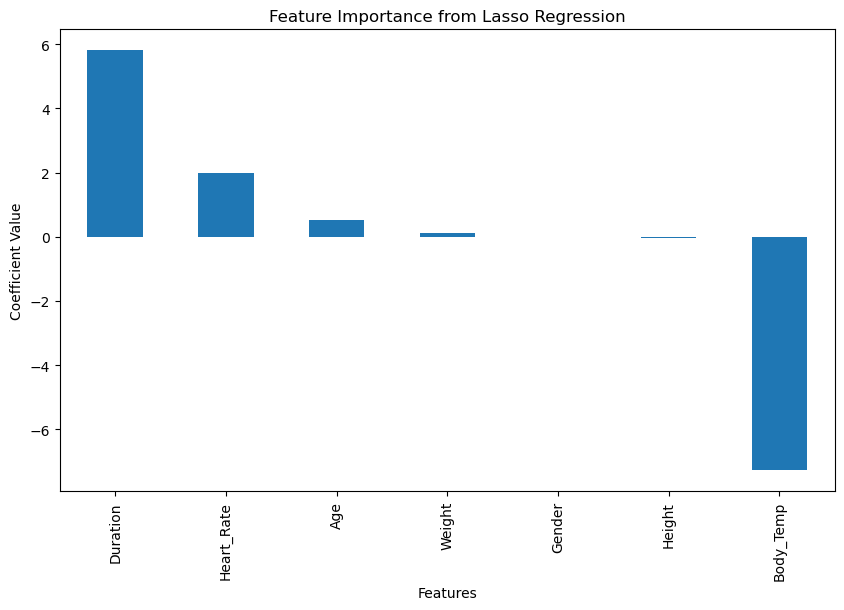

In [37]:
## Plot feature importance from lasso regression

importance = pd.Series(lasso_model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importance from Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

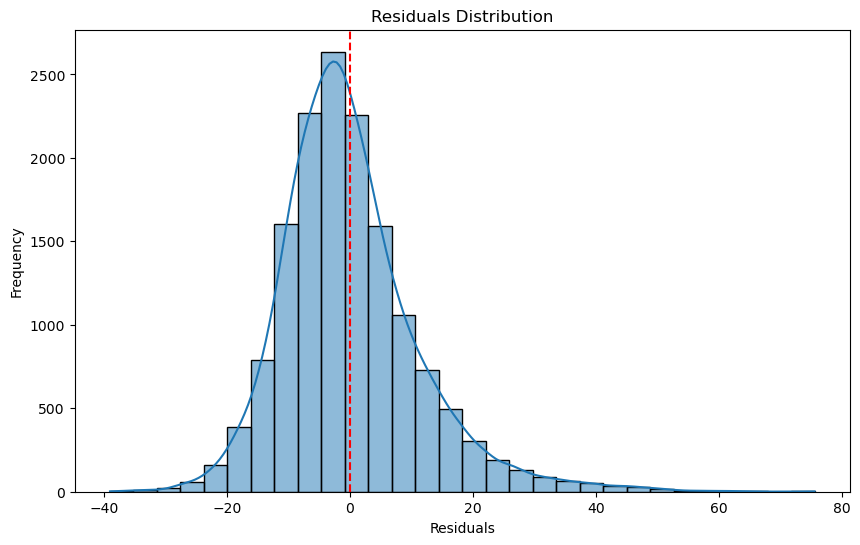

In [16]:
## Residual plot

residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

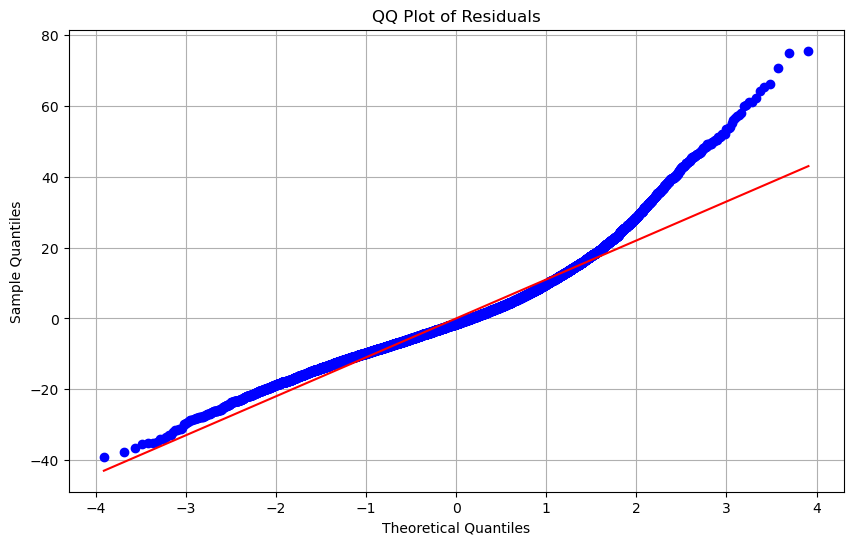

In [17]:
## QQ Plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

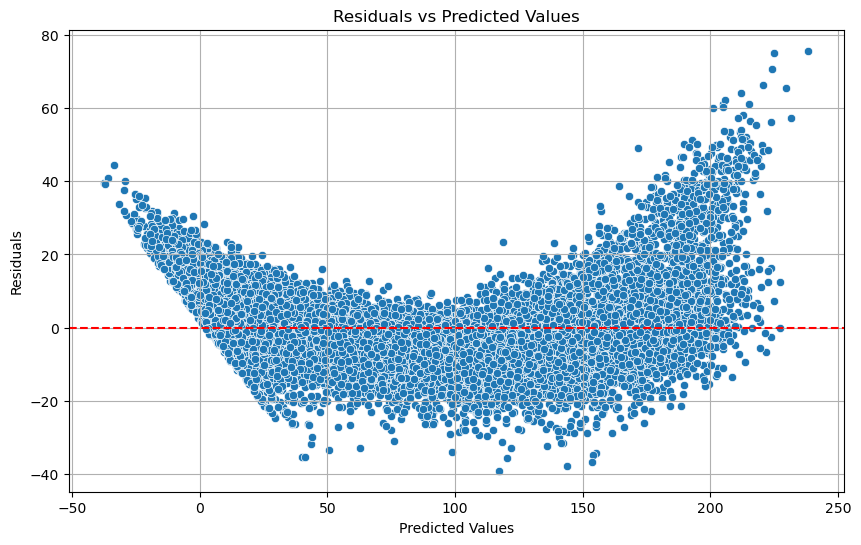

In [18]:
## Residuals vs Predicted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()